In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

# MNIST dataset

In [29]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
# visualization

def show_image(df,label,i):
    plt.imshow(df[i])
    plt.xlabel(label[i])
    plt.show()

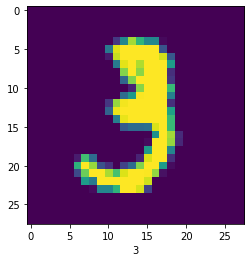

In [10]:
show_image(x_train,y_train,10)

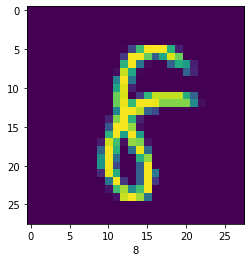

In [12]:
show_image(x_train,y_train,456)

In [30]:
# normalization

x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

# CNN

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
# reshaping for cnn

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [22]:
cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters = 28,kernel_size = (3,3), input_shape = (28,28,1),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 28,kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    # ann
    keras.layers.Flatten(),
    keras.layers.Dense(28 , activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(14, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
cnn.fit(x_train,y_train,epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7416 - accuracy: 0.7519
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4020 - accuracy: 0.8689
Epoch 3/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3434 - accuracy: 0.8892
Epoch 4/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3046 - accuracy: 0.9025
Epoch 5/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2790 - accuracy: 0.9074
Epoch 6/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2671 - accuracy: 0.9136
Epoch 7/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2486 - accuracy: 0.9201
Epoch 8/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2408 - accuracy: 0.9213
Epoch 9/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2324 - accuracy: 0.9251
Epoch 10/50
1875/1875 [==============================] - 20s 11ms

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.9886


[0.09158241748809814, 0.9886000156402588]

In [35]:
y_pred = cnn.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]

<AxesSubplot:>

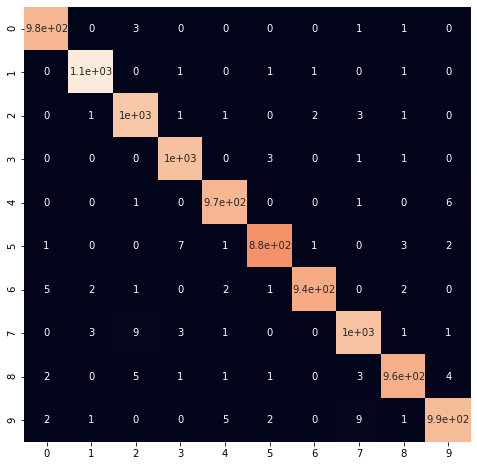

In [36]:
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cbar = False)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

